In [1]:
import pandas as pd

In [2]:
superstore=pd.read_csv("Superstore_OrderAndReturns.csv")
superstore=superstore.drop(["Row ID","Order ID","Postal Code"],axis=True)

In [3]:
superstore.head()

,orderReturned,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,False,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,False,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,False,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,False,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
superstore.dtypes

orderReturned       bool
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

#### Date-Time Conversion mit Extraktion der Anzahl Tage

In [5]:
from datetime import datetime

In [6]:
d1 = datetime.strptime('2022-10-10', '%Y-%M-%d')
d2 = datetime.strptime('2022-10-11', '%Y-%M-%d')

In [7]:
(d2-d1).days

1

### Aufgabe 1 Packtage

In [35]:
packtage=[]
for i in superstore.index:
    row=superstore.iloc[i]
    dOrder = datetime.strptime(row["Order Date"], '%Y-%M-%d')
    dShip = datetime.strptime(row["Ship Date"], '%Y-%M-%d')
    
    if i == 9990:
        print(dOrder, dShip)
    d=(dShip-dOrder).days
    packtage.append(d)

2017-01-26 00:02:00 2017-01-03 00:03:00


In [33]:
superstore["Packtage"].i

0        3
1        3
2        4
3        7
4        7
        ..
9989     2
9990   -23
9991   -23
9992   -23
9993     5
Name: Packtage, Length: 9994, dtype: int64

In [34]:
superstore.iloc[9990]

orderReturned                                                 True
Order Date                                              2017-02-26
Ship Date                                               2017-03-03
Ship Mode                                           Standard Class
Customer ID                                               DB-13060
Customer Name                                          Dave Brooks
Segment                                                   Consumer
Country                                              United States
City                                                    Costa Mesa
State                                                   California
Region                                                        West
Product ID                                         FUR-FU-10000747
Category                                                 Furniture
Sub-Category                                           Furnishings
Product Name     Tenex B1-RE Series Chair Mats for Low Pile Ca

In [28]:
superstore["Packtage"]=packtage
superstore.shape

(9994, 20)

In [29]:
superstorePack=superstore[(superstore.Packtage>=0) & (superstore.Packtage<=10)]
superstorePack.shape

(8835, 20)

In [11]:
superstorePack.Packtage.describe()

count    8835.000000
mean        3.854216
std         1.759036
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Packtage, dtype: float64

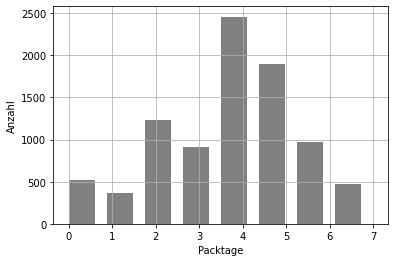

In [12]:
axis=superstorePack.Packtage.hist(bins=8,color="gray",width=0.6)
axis.set_xlabel("Packtage");
axis.set_ylabel("Anzahl");

### Aufgabe 2 statistische Abhängigkeit

#### kategorische Variablen

In [13]:
from scipy.stats import chi2_contingency

def chisquare(testvariable):    
    contingencyTable=pd.crosstab(superstore[testvariable],superstore.orderReturned)
    chi2,pval,dof,expectedFreq=chi2_contingency(contingencyTable)
    print("testvariable:",testvariable,"chi2=",chi2,"pval=",'{:0.2f}'.format(pval))#show pval in non-scienetific expression
    if (testvariable=="Region") or (testvariable=="Category"):
        print(contingencyTable)
        print()
    return pval


In [14]:
dtypes=superstore.dtypes
categoryVars=[]
for var in dtypes.keys():
    if (dtypes[var]=="object"):
        pval=chisquare(var)
        categoryVars.append((pval,var))

testvariable: Order Date chi2= 3455.9661674067534 pval= 0.00
testvariable: Ship Date chi2= 3770.352781053294 pval= 0.00
testvariable: Ship Mode chi2= 22.946707924156424 pval= 0.00
testvariable: Customer ID chi2= 2607.899579575592 pval= 0.00
testvariable: Customer Name chi2= 2607.899579575592 pval= 0.00
testvariable: Segment chi2= 6.373606618240836 pval= 0.04
testvariable: Country chi2= 0.0 pval= 1.00
testvariable: City chi2= 1716.6553979669536 pval= 0.00
testvariable: State chi2= 426.88057562588557 pval= 0.00
testvariable: Region chi2= 343.5657490095074 pval= 0.00
orderReturned  False  True
Region                    
Central         2231    92
East            2699   149
South           1551    69
West            2713   490

testvariable: Product ID chi2= 1759.3179634306925 pval= 0.95
testvariable: Category chi2= 0.6958311295580347 pval= 0.71
orderReturned    False  True
Category                    
Furniture         1950   171
Office Supplies   5553   473
Technology        1691   156



In [15]:
categoryVars.sort()
categoryVars

[(4.1800946796935595e-231, 'Ship Date'),
 (7.234669623672484e-209, 'Order Date'),
 (3.79617526055892e-192, 'Customer ID'),
 (3.79617526055892e-192, 'Customer Name'),
 (4.140227467399147e-125, 'City'),
 (3.688494292690061e-74, 'Region'),
 (3.267148885531326e-62, 'State'),
 (4.142917437082975e-05, 'Ship Mode'),
 (0.04130369527195776, 'Segment'),
 (0.21181433298150926, 'Sub-Category'),
 (0.7061584983461016, 'Category'),
 (0.9542057559063147, 'Product ID'),
 (0.9627640476894348, 'Product Name'),
 (1.0, 'Country')]

#### metrische Variablen

In [16]:
from scipy.stats  import ttest_ind
normal=superstore[superstore.orderReturned==False]
back=superstore[superstore.orderReturned==True]
def student(testvariable):      
    tval,pval=ttest_ind(normal[testvariable],back[testvariable])
    print("var:",testvariable,"tval={:.1f}".format(tval),
          "pval={:.4f}".format(pval),
          "μNormal={:.1f}".format(normal[testvariable].mean()),"σNormal={:.1f}".format(normal[testvariable].std()),
         "μBack={:.1f}".format(back[testvariable].mean()),"σBack={:.1f}".format(back[testvariable].std()))
    return pval

In [17]:
dtypes=superstore.dtypes
metricVars=[]
for var in dtypes.keys():
    if (dtypes[var] != "object") & (var != "orderReturned"):
        pval=student(var)
        metricVars.append((pval,var))

var: Sales tval=0.2 pval=0.8415 μNormal=230.2 σNormal=623.6 μBack=225.6 σBack=619.9
var: Quantity tval=-0.4 pval=0.7237 μNormal=3.8 σNormal=2.2 μBack=3.8 σBack=2.2
var: Discount tval=1.8 pval=0.0680 μNormal=0.2 σNormal=0.2 μBack=0.1 σBack=0.2
var: Profit tval=-0.0 pval=0.9615 μNormal=28.6 σNormal=228.2 μBack=29.0 σBack=295.5
var: Packtage tval=-4.1 pval=0.0000 μNormal=5.4 σNormal=40.4 μBack=11.8 σBack=59.1


In [18]:
metricVars.sort()
metricVars

[(4.434691372642907e-05, 'Packtage'),
 (0.06797722342895628, 'Discount'),
 (0.7237043510125096, 'Quantity'),
 (0.84146589808265, 'Sales'),
 (0.9614937549856728, 'Profit')]

#### Statistik über alle Variablen

In [19]:
allVars=[]
for entry in categoryVars:
    allVars.append(entry)
for entry in metricVars:
    allVars.append(entry)
allVars.sort()
allVars

[(4.1800946796935595e-231, 'Ship Date'),
 (7.234669623672484e-209, 'Order Date'),
 (3.79617526055892e-192, 'Customer ID'),
 (3.79617526055892e-192, 'Customer Name'),
 (4.140227467399147e-125, 'City'),
 (3.688494292690061e-74, 'Region'),
 (3.267148885531326e-62, 'State'),
 (4.142917437082975e-05, 'Ship Mode'),
 (4.434691372642907e-05, 'Packtage'),
 (0.04130369527195776, 'Segment'),
 (0.06797722342895628, 'Discount'),
 (0.21181433298150926, 'Sub-Category'),
 (0.7061584983461016, 'Category'),
 (0.7237043510125096, 'Quantity'),
 (0.84146589808265, 'Sales'),
 (0.9542057559063147, 'Product ID'),
 (0.9614937549856728, 'Profit'),
 (0.9627640476894348, 'Product Name'),
 (1.0, 'Country')]

In [20]:
import numpy as n
allVarsMatrix=n.array(allVars)
heights=[]

for val in allVarsMatrix[0:10,0]:
    heights.append(float(val))

In [21]:
for var in allVarsMatrix[0:10,0]:
    print(var)

4.1800946796935595e-231
7.234669623672484e-209
3.79617526055892e-192
3.79617526055892e-192
4.140227467399147e-125
3.688494292690061e-74
3.267148885531326e-62
4.142917437082975e-05
4.434691372642907e-05
0.04130369527195776


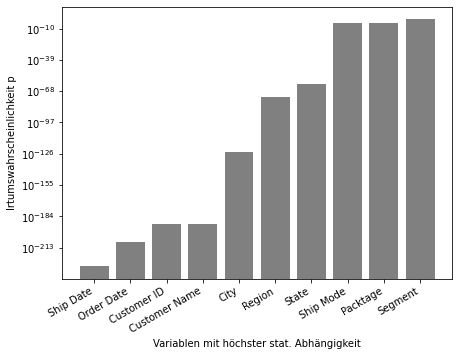

In [22]:
from matplotlib import pyplot as plt

figure,axis=plt.subplots(figsize=(7,5))


axis.bar(x=range(len(heights)),height=heights,color="gray",
         tick_label=allVarsMatrix[0:10,1])
axis.set_yscale('log')
axis.set_xlabel("Variablen mit höchster stat. Abhängigkeit")
axis.set_ylabel("Irtumswahrscheinlichkeit p");
#plt.ylim(top=0.0001) #schlechtere Alternative zur log-scale
plt.xticks(rotation=30,ha='right');


### Aufgabe 3 Reduktion der Retouren

In [23]:
def showMeans(aAxis,aVariableName,aLabel):
    
    aAxis.bar(x=range(2),
              height=[normal[aVariableName].mean(),back[aVariableName].mean()],
              yerr=[[0,0],
                   [normal[aVariableName].std(),back[aVariableName].std()]],
              tick_label=["Normal","Rücksendung"],
              width=0.4,color="gray",capsize=4,edgeColor="gray",ecolor="gray")
    aAxis.set_ylabel(aLabel)
    

In [27]:
normal["Packtage"].mean()

5.445725473134653

C:\Users\I550854\AppData\Local\Temp/ipykernel_15892/3963187350.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  aAxis.bar(x=range(2),


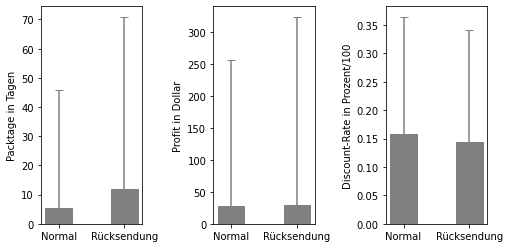

In [24]:
figure,axes=plt.subplots(figsize=(8,4),ncols=3)
showMeans(axes[0],"Packtage","Packtage in Tagen")
showMeans(axes[1],"Profit","Profit in Dollar")
showMeans(axes[2],"Discount","Discount-Rate in Prozent/100")
plt.subplots_adjust(wspace=0.7)#space between plots

In [25]:
normal.Region.value_counts()

West       2713
East       2699
Central    2231
South      1551
Name: Region, dtype: int64

In [127]:
back.Region.value_counts()

West       490
East       149
Central     92
South       69
Name: Region, dtype: int64

In [157]:
def showValueCounts(aAxis,aVariableName,aShowYlabel=False):
    normalTotal=len(normal)
    normalCounts=normal[aVariableName].value_counts()
    backTotal=len(back)
    backCounts=back[aVariableName].value_counts()
    tick_label=[]
    normalHeights=[]
    backHeights=[]
    for val in normalCounts.keys():
        print(val,normalCounts[val]/normalTotal,backCounts[val]/backTotal)
        tick_label.append(val)
        totalCounts=normalCounts[val]+backCounts[val]
        normalHeights.append(100*(normalCounts[val]/totalCounts))
        backHeights.append(100*(backCounts[val]/totalCounts))
    aAxis.bar(x=range(len(tick_label)),
             height=normalHeights,
             tick_label=tick_label)
    aAxis.bar(x=range(len(tick_label)),
             height=backHeights,
             bottom=normalHeights)
    if aShowYlabel:
        aAxis.set_ylabel("Prozent")
    aAxis.legend(["Normalbestellung","Rücksendung"])    

West 0.29508375027191647 0.6125
East 0.2935610180552534 0.18625
Central 0.24265825538394606 0.115
South 0.16869697628888405 0.08625
Office Supplies 0.6039808570807048 0.59125
Furniture 0.2120948444637807 0.21375
Technology 0.18392429845551447 0.195


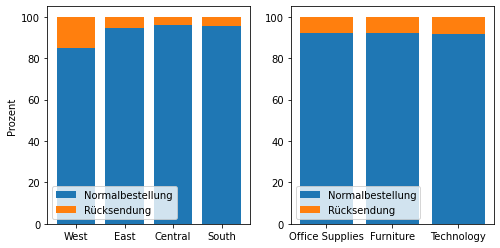

In [158]:
figure,axes=plt.subplots(figsize=(8,4),ncols=2)

showValueCounts(axes[0],"Region",True)
showValueCounts(axes[1],"Category")